In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
x_all = np.concatenate((x_train, x_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)


In [17]:
x_train, x_temp, y_train, y_temp = train_test_split(x_all, y_all, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [18]:
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_val_flat = x_val.reshape((x_val.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))


In [19]:
k_values = [1, 3, 5, 10, 50, 100, 110]
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

best_k = None
best_val_accuracy = 0
best_test_pred = None


In [20]:
for k in k_values:

    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train_flat, y_train.ravel())

    y_train_pred = knn.predict(x_train_flat)

    y_val_pred = knn.predict(x_val_flat)

    y_test_pred = knn.predict(x_test_flat)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_loss = 1 - train_accuracy
    val_loss = 1 - val_accuracy
    
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f"k={k} Train Accuracy: {train_accuracy:.4f} Validation Accuracy: {val_accuracy:.4f} Test Accuracy: {test_accuracy:.4f}")
    print(f"k={k} Train Loss: {train_loss:.4f} Validation Loss: {val_loss:.4f}")
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_k = k
        best_test_pred = y_test_pred


k=1 Train Accuracy: 1.0000 Validation Accuracy: 0.3319 Test Accuracy: 0.3362
k=1 Train Loss: 0.0000 Validation Loss: 0.6681
k=3 Train Accuracy: 0.5698 Validation Accuracy: 0.3197 Test Accuracy: 0.3244
k=3 Train Loss: 0.4302 Validation Loss: 0.6803
k=5 Train Accuracy: 0.4962 Validation Accuracy: 0.3272 Test Accuracy: 0.3253
k=5 Train Loss: 0.5038 Validation Loss: 0.6727
k=10 Train Accuracy: 0.4208 Validation Accuracy: 0.3217 Test Accuracy: 0.3268
k=10 Train Loss: 0.5793 Validation Loss: 0.6783
k=50 Train Accuracy: 0.3294 Validation Accuracy: 0.3070 Test Accuracy: 0.3051
k=50 Train Loss: 0.6706 Validation Loss: 0.6930
k=100 Train Accuracy: 0.3062 Validation Accuracy: 0.2965 Test Accuracy: 0.2951
k=100 Train Loss: 0.6938 Validation Loss: 0.7035
k=110 Train Accuracy: 0.3036 Validation Accuracy: 0.2941 Test Accuracy: 0.2932
k=110 Train Loss: 0.6964 Validation Loss: 0.7059


In [21]:

print(f"Best K value = {best_k}")


Best K value = 1


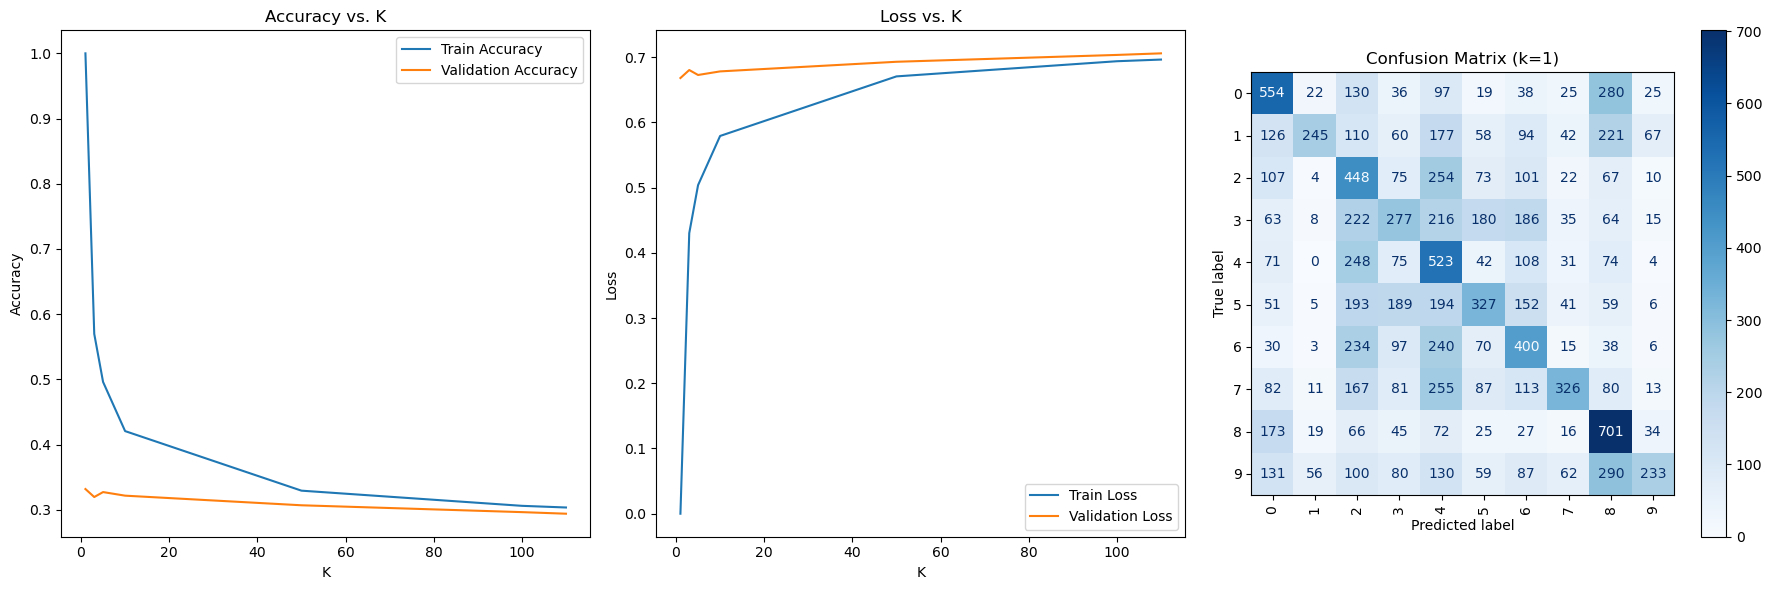

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].plot(k_values, train_accuracies, label='Train Accuracy')
axes[0].plot(k_values, val_accuracies, label='Validation Accuracy')
axes[0].set_xlabel('K')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy vs. K')
axes[0].legend()

axes[1].plot(k_values, train_losses, label='Train Loss')
axes[1].plot(k_values, val_losses, label='Validation Loss')
axes[1].set_xlabel('K')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss vs. K')
axes[1].legend()

conf_matrix = confusion_matrix(y_test, best_test_pred)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(ax=axes[2], xticks_rotation='vertical', cmap='Blues')
axes[2].set_title(f"Confusion Matrix (k={best_k})")

plt.tight_layout()
plt.show()


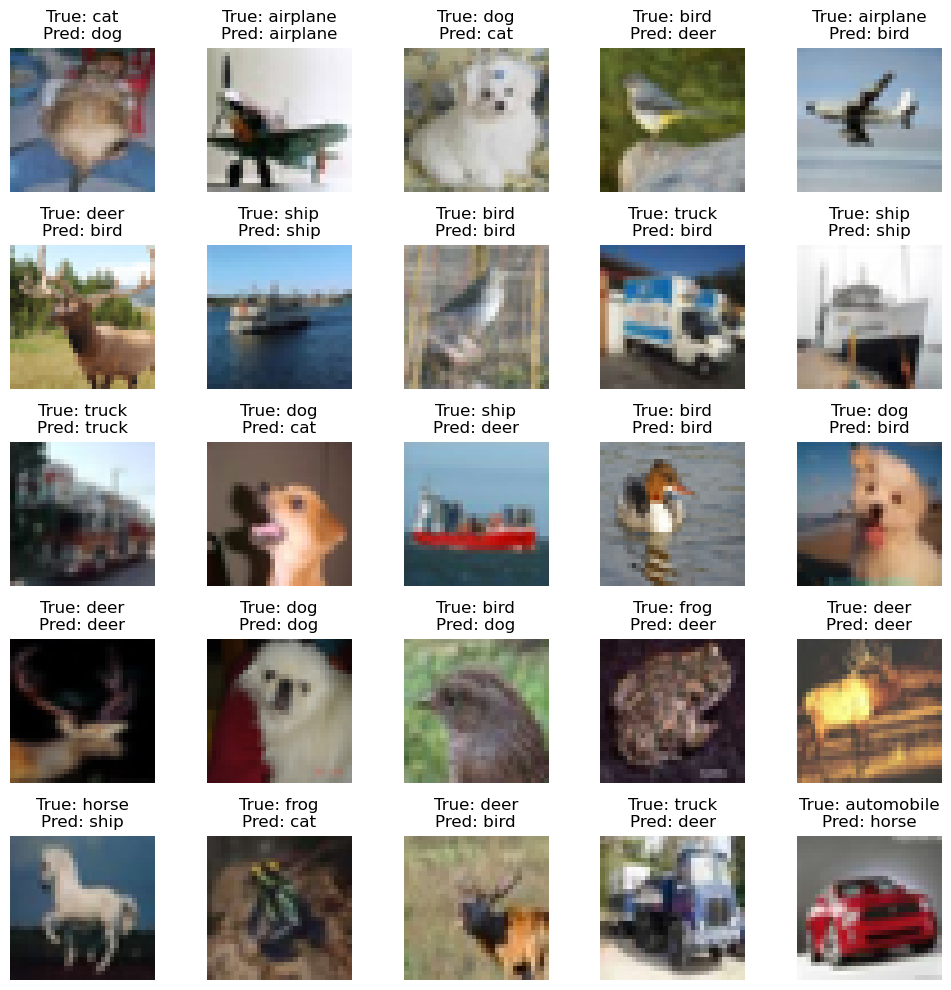

In [23]:
axes[1, 1].axis('off')
fig_25, axes_25 = plt.subplots(5, 5, figsize=(10, 10))
axes_25 = axes_25.ravel()
for i in range(25):
    axes_25[i].imshow(x_test[i])
    true_label = class_names[y_test[i][0]]
    pred_label = class_names[best_test_pred[i]]
    axes_25[i].set_title(f"True: {true_label}\nPred: {pred_label}")
    axes_25[i].axis('off')
plt.tight_layout()
plt.show()
